In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder



In [7]:
df = pd.read_csv("Housing.csv")

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
#  One-hot encode furnishingstatus 
encoder = OneHotEncoder(drop=None, sparse_output=False)  # keep all categories
encoded_array = encoder.fit_transform(df[['furnishingstatus']])

# Create DataFrame with encoded cols
encoded_cols = encoder.get_feature_names_out(['furnishingstatus'])
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Drop old col + integrate encoded cols
df_encoded = pd.concat([df.drop("furnishingstatus", axis=1), encoded_df], axis=1)
df_encoded


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1.0,0.0,0.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1.0,0.0,0.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0.0,1.0,0.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1.0,0.0,0.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0.0,0.0,1.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,0.0,1.0,0.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0.0,0.0,1.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,1.0,0.0,0.0


In [10]:
df_encoded["mainroad"] = df_encoded["mainroad"].map({"yes": 1, "no": 0})
df_encoded["guestroom"] = df_encoded["guestroom"].map({"yes": 1, "no": 0})
df_encoded["basement"] = df_encoded["basement"].map({"yes": 1, "no": 0})
df_encoded["hotwaterheating"] = df_encoded["hotwaterheating"].map({"yes": 1, "no": 0})
df_encoded["airconditioning"] = df_encoded["airconditioning"].map({"yes": 1, "no": 0})
df_encoded["prefarea"] = df_encoded["prefarea"].map({"yes": 1, "no": 0})



In [11]:

scaler = StandardScaler()

# reshape (-1, 1) makes it 2D: (n_samples, 1)
df_encoded["price"] = scaler.fit_transform(df_encoded[["price"]])
df_encoded["area"] = scaler.fit_transform(df_encoded[["area"]])


In [12]:
df_encoded # new data set that contain complete numeric data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,2,1,1,1,0,1,0,0,2,0,0.0,0.0,1.0
541,-1.605149,-1.268613,3,1,1,0,0,0,0,0,0,0,0.0,1.0,0.0
542,-1.614327,-0.705921,2,1,1,1,0,0,0,0,0,0,0.0,0.0,1.0
543,-1.614327,-1.033389,3,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0


In [13]:
X = df_encoded.drop(columns=["price"])
y = df_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) 

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.42
R² Score: 0.7126


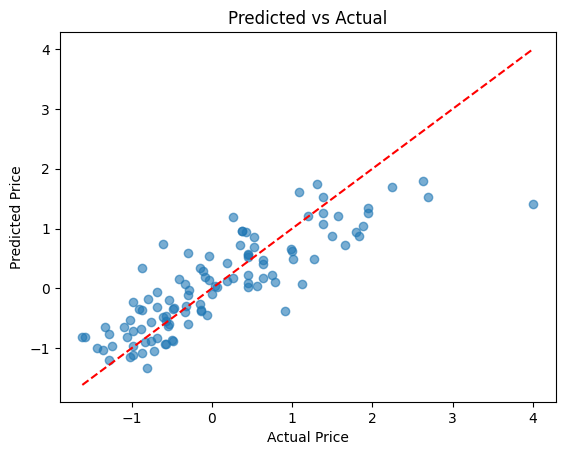

In [18]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")
plt.show()


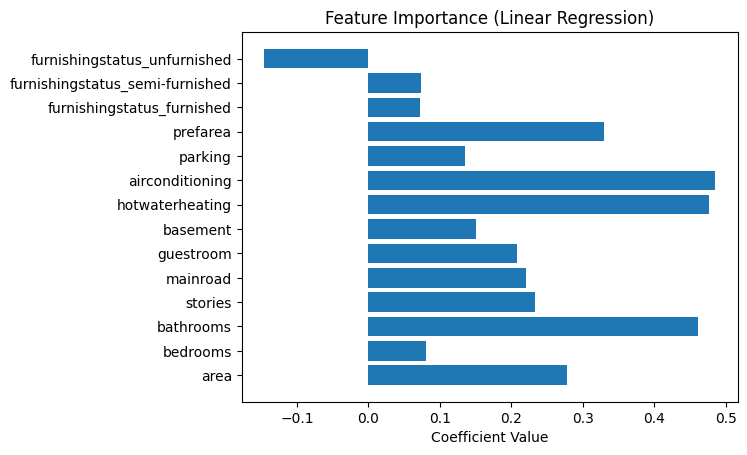

In [19]:
plt.barh(X_train.columns, model.coef_)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression)")
plt.show()